In [117]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

analisis question 1 zipcode vs clustering location

In [2]:
# Open calendar data
boston_calendar = pd.read_csv("boston_airbnb_data/calendar.csv")
seattle_calendar = pd.read_csv("seattle_airbnb_data/calendar.csv")
# Open listings data
boston_listings = pd.read_csv("boston_airbnb_data/listings.csv")
seattle_listings = pd.read_csv("seattle_airbnb_data/listings.csv")

In [3]:
# Concatenate the data calendar from Boston and Seattle
df_calendar = pd.concat([boston_calendar,seattle_calendar ], axis=0,ignore_index=True)
# Drop price column because we don't need it for our analysis
df_calendar = df_calendar.drop('price', axis=1)
# Get one column for each variable on for t(true) and one for f(false)
df_calendar = pd.concat([df_calendar.drop('available', axis=1), pd.get_dummies(df_calendar['available'], prefix='available', prefix_sep='_')], axis=1)
# Group by each list id by adding the number of times each list_id is available and unavailable
df_occupation = df_calendar.groupby("listing_id").sum()
# Add a column with the occupancy percentage, which is the number of days occupied divided by the total number of days registered
df_occupation["occupation_percentage"] = df_occupation["available_f"]*100/(df_occupation["available_f"]+df_occupation["available_t"])
# Drop columns will no longer be used
df_occupation = df_occupation.drop(["available_f","available_t"], axis=1)
# Before concatenating listings dataframes, we need to remove the columns that have boston and not seattle
boston_listings = boston_listings.drop( ['access', 'interaction', 'house_rules'], axis=1)
# Concatenate the data listings from Boston and Seattle
df_listings = pd.concat([boston_listings, seattle_listings], axis=0)

In [80]:
# Create a consolidate dataframe with all the airbnb data including the ocupattion rate that wass alcasdflklasdf
df = pd.merge(df_listings, df_occupation,left_on="id",right_on="listing_id", how="inner")

In [81]:
columns_of_interest = ['occupation_percentage','city','zipcode','latitude','longitude']
df = df[columns_of_interest]

In [82]:
#Help function to mantain in city column just seattle or boston values, other value are change to nan
def check_city(value):
    if value == "Seattle" or value == "Boston":
        return value
    else: 
        return np.nan
    
# Apply the help function    
df['city'] = df['city'].apply(check_city)

In [83]:
# para este analisis como vamos a comparar cual es mejor indicador no podemos tener valores vacios ni aplicar metdoso
df = df.dropna()

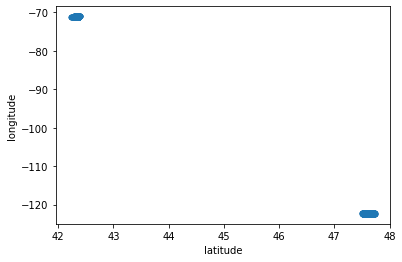

In [26]:
# no podemos usar el algoritmo para las dos ciudades la data al ser espacial esta muy separada y pierde sensibilidad
df.plot.scatter(x='latitude',y='longitude')

In [105]:
df_boston = df[df["city"]=="Boston"]

In [85]:
df_seattle = df[df["city"]=="Seattle"]

In [49]:
cordinates_boston = df_boston[["latitude","longitude"]]

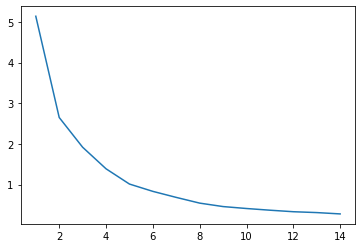

In [51]:
inertia = []

for i in range(1,15):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',max_iter = 300,n_init=10,random_state = 0)
    kmeans.fit(cordinates_boston)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1,15),inertia)
plt.show()

In [106]:
kmeans = KMeans(n_clusters = 8,init = 'k-means++',max_iter = 300,n_init=10,random_state = 0)
boston_8cluster = df_boston.copy()
boston_8cluster["cluster"] = kmeans.fit_predict(cordinates_boston)

In [107]:
boston_8cluster = boston_8cluster.drop(["city","zipcode","latitude","longitude"],axis=1)

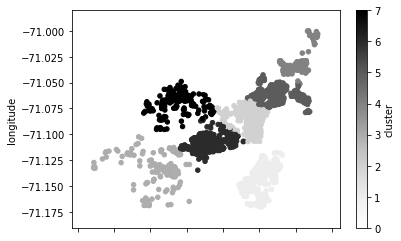

In [65]:
cordinates_boston_8cluster.plot.scatter(x='latitude',y='longitude',c='cluster')

In [90]:
df_boston_zipcode = df_boston[["occupation_percentage","zipcode"]]

In [91]:
df_boston_zipcode

,occupation_percentage,zipcode
0,100.000000,02131
1,1.643836,02131
2,12.602740,02131
4,8.493151,02131
5,84.109589,02131
...,...,...
3533,100.000000,02134
3534,98.904110,02134
3535,100.000000,02134
3559,0.000000,02129


In [92]:
df_boston_zipcode = pd.concat([df_boston_zipcode.drop('zipcode', axis=1), pd.get_dummies(df_boston_zipcode['zipcode'], prefix='zipcode', prefix_sep='_', drop_first=True)], axis=1)

In [93]:
df_boston_zipcode

,occupation_percentage,zipcode_02108 02111,zipcode_02109,zipcode_02110,zipcode_02111,zipcode_02113,zipcode_02114,zipcode_02115,zipcode_02116,zipcode_02118,zipcode_02119,zipcode_02120,zipcode_02121,zipcode_02122,zipcode_02124,zipcode_02125,zipcode_02126,zipcode_02127,zipcode_02128,zipcode_02129,zipcode_02130,zipcode_02131,zipcode_02132,zipcode_02134,zipcode_02134-1704,zipcode_02135,zipcode_02136,zipcode_02163,zipcode_02210,zipcode_02215,zipcode_02218,zipcode_02467
0,100.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1.643836,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,12.602740,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,8.493151,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,84.109589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3533,100.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3534,98.904110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3535,100.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3559,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [95]:
#Split data into an X matrix and a response vector y
y = df_boston_zipcode['occupation_percentage']
X = df_boston_zipcode.drop('occupation_percentage', axis=1)
#6. Create training and test sets of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
#7. Instantiate a LinearRegression model with normalized data
lm_model = LinearRegression(normalize=True)
#8. Fit your model to the training data
lm_model.fit(X_train, y_train)
#9. Predict the response for the training data and the test data
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)
#10. Obtain an rsquared value for both the training and test data
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [96]:
test_score

0.0134045518200403

In [97]:
train_score

0.05276517657797597

In [108]:
boston_8cluster

,occupation_percentage,cluster
0,100.000000,3
1,1.643836,3
2,12.602740,3
4,8.493151,3
5,84.109589,3
...,...,...
3533,100.000000,1
3534,98.904110,1
3535,100.000000,1
3559,0.000000,4


In [109]:
boston_8cluster = pd.concat([boston_8cluster.drop('cluster', axis=1), pd.get_dummies(boston_8cluster['cluster'], prefix='cluster', prefix_sep='_', drop_first=True)], axis=1)

In [110]:
boston_8cluster

,occupation_percentage,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7
0,100.000000,0,0,1,0,0,0,0
1,1.643836,0,0,1,0,0,0,0
2,12.602740,0,0,1,0,0,0,0
4,8.493151,0,0,1,0,0,0,0
5,84.109589,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
3533,100.000000,1,0,0,0,0,0,0
3534,98.904110,1,0,0,0,0,0,0
3535,100.000000,1,0,0,0,0,0,0
3559,0.000000,0,0,0,1,0,0,0


In [111]:
#Split data into an X matrix and a response vector y
y = boston_8cluster['occupation_percentage']
X = boston_8cluster.drop('occupation_percentage', axis=1)
#6. Create training and test sets of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
#7. Instantiate a LinearRegression model with normalized data
lm_model = LinearRegression(normalize=True)
#8. Fit your model to the training data
lm_model.fit(X_train, y_train)
#9. Predict the response for the training data and the test data
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)
#10. Obtain an rsquared value for both the training and test data
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [112]:
test_score

0.012880680382099108

In [113]:
train_score

0.03604452241362688

In [114]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

In [115]:
#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

In [116]:
coef_df

,est_int,coefs,abs_coefs
0,cluster_1,18.625593,18.625593
6,cluster_7,-12.714150,12.714150
5,cluster_6,10.866887,10.866887
4,cluster_5,9.662152,9.662152
1,cluster_2,8.231481,8.231481
2,cluster_3,-8.144076,8.144076
3,cluster_4,1.775744,1.775744


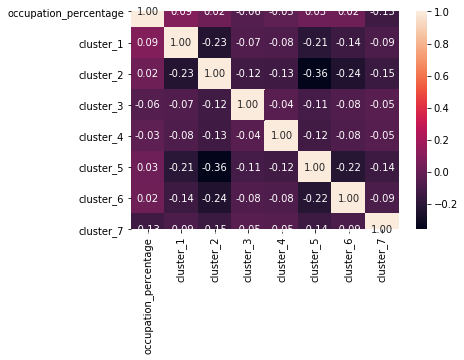

In [118]:
sns.heatmap(boston_8cluster.corr(), annot=True, fmt=".2f");